In [1]:
# Выявление влиятельных наблюдений и выбросов

import pandas as pd # работа с таблицами 
import numpy as np # математические функции и матрицы
import matplotlib.pyplot as plt # графики
import seaborn as sns # еще более классные графики
import statsmodels.api as sm # стандартные регрессионные модели
import statsmodels.formula.api as smf # аналогичные модели с синтаксисом в стиле R
import statsmodels.graphics.gofplots as gf # визуализация моделей
import statsmodels.discrete.discrete_model # дискретные модели
from statsmodels.stats.outliers_influence import summary_table # работа с выбросами
from scipy.stats import shapiro # тест Шапиро – Уилка 
import math

In [2]:
# При желании можем настроить графики по своему вкусу, изменив стиль и другие параметры шрифтов и графиков
# (https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)

In [3]:
# Импортируем данные об экономике Баккардии

data = pd.read_excel('/Users/polinapogorelova/Desktop/Метрика_ИП/Данные/Chow_2.xls')

In [4]:
data

,Year,Quarter,C,Y,D1,D2,D3,D4
0,2015,1,76.11,92.12,1,0,0,0
1,2015,2,75.80,95.01,0,1,0,0
2,2015,3,79.54,95.27,0,0,1,0
3,2015,4,80.07,97.05,0,0,0,1
4,2016,1,81.86,97.06,1,0,0,0
5,2016,2,82.57,98.99,0,1,0,0
6,2016,3,84.00,99.02,0,0,1,0
7,2016,4,81.33,94.34,0,0,0,1
8,2017,1,78.64,95.50,1,0,0,0
9,2017,2,79.08,98.25,0,1,0,0


In [5]:
# Задание 1. Оценим модель регрессии с факторной переменной Quarter (номер квартала)

data.dtypes

Year         int64
Quarter      int64
C          float64
Y          float64
D1           int64
D2           int64
D3           int64
D4           int64
dtype: object

In [6]:
# Создадим дамми переменные для факторной переменной Quarter (номер квартала)

pd.get_dummies(data, columns = ["Quarter"])

,Year,C,Y,D1,D2,D3,D4,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,2015,76.11,92.12,1,0,0,0,1,0,0,0
1,2015,75.80,95.01,0,1,0,0,0,1,0,0
2,2015,79.54,95.27,0,0,1,0,0,0,1,0
3,2015,80.07,97.05,0,0,0,1,0,0,0,1
4,2016,81.86,97.06,1,0,0,0,1,0,0,0
5,2016,82.57,98.99,0,1,0,0,0,1,0,0
6,2016,84.00,99.02,0,0,1,0,0,0,1,0
7,2016,81.33,94.34,0,0,0,1,0,0,0,1
8,2017,78.64,95.50,1,0,0,0,1,0,0,0
9,2017,79.08,98.25,0,1,0,0,0,1,0,0


In [7]:
pd.get_dummies(data, columns = ["Quarter"],drop_first = True)

,Year,C,Y,D1,D2,D3,D4,Quarter_2,Quarter_3,Quarter_4
0,2015,76.11,92.12,1,0,0,0,0,0,0
1,2015,75.80,95.01,0,1,0,0,1,0,0
2,2015,79.54,95.27,0,0,1,0,0,1,0
3,2015,80.07,97.05,0,0,0,1,0,0,1
4,2016,81.86,97.06,1,0,0,0,0,0,0
5,2016,82.57,98.99,0,1,0,0,1,0,0
6,2016,84.00,99.02,0,0,1,0,0,1,0
7,2016,81.33,94.34,0,0,0,1,0,0,1
8,2017,78.64,95.50,1,0,0,0,0,0,0
9,2017,79.08,98.25,0,1,0,0,1,0,0


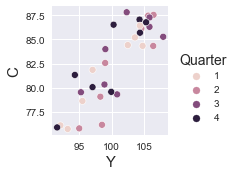

In [8]:
# Построим диаграмму рассеяния потребления от дохода, учитывая номер квартала, к которому относится наблюдение

sns.pairplot(data,x_vars = ['Y'],y_vars=['C'],hue = 'Quarter')

In [9]:
# Оценим модель регрессии для потребления, используя в качестве объясняющих переменных доход и квартал (сезонность)

model_1 = smf.ols('C ~ Y + D2 + D3 + D4', data = data).fit() 
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     22.79
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.53e-08
Time:                        13:11:50   Log-Likelihood:                -66.356
No. Observations:                  32   AIC:                             142.7
Df Residuals:                      27   BIC:                             150.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8255      8.275      0.583      0.565     -12.153      21.804
Y              0.7745      0.083      9.315      0.000       0.604       0.945
D2            -1.2073      1.069     -1.129      0.269      -3.402       0.987
D3            -0.0631      1.074     -0.059      0.954      -2.267       2.140
D4             0.8778      1.048      0.837      0.410      -1.273       3.029
==============================================================================
Omnibus:                        0.261   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.451
Skew:                          -0.114   Prob(JB):                        0.798
Kurtosis:                       2.465   Cond. No.                     2.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Проверим гипотезу об отсутствии сезонности

hypotheses = '(D2 = D3 = D4 = 0)' # формулируем гипотезу H_0
print(model_1.f_test(r_matrix = hypotheses)) # тестируем гипотезу с помощью F-теста

<F test: F=array([[1.29612782]]), p=0.2959551159442777, df_denom=27, df_num=3>


In [11]:
# Оценим эту же модель, но включи все дамми на сезонность и исключив константу

model_1_wc = smf.ols('C ~ 0 + Y + D2 + D3 + D4', data = data).fit() 
model_1_wc.summary() # получили тот же самый результат, что и в модели model_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      C   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.277e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                    3.28e-45
Time:                        13:11:56   Log-Likelihood:                         -66.556
No. Observations:                  32   AIC:                                      141.1
Df Residuals:                      28   BIC:                                      147.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Y              0.8228      0.007    111.870      0.000       0.808       0.838
D2            -1.2934      1.047     -1.236      0.227      -3.437       0.850
D3            -0.1619      1.048     -0.155      0.878      -2.309       1.985
D4             0.8918      1.036      0.861      0.397      -1.230       3.013
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.433
Skew:                          -0.107   Prob(JB):                        0.805
Kurtosis:                       2.472   Cond. No.                         408.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Создадим переменные взаимодействия (перекрестные переменные), чтобы учесть возможную разную зависимость потребления 
# от дохода в разные кварталы

data['yq2'] = data['Y']*data['D2']
data['yq3'] = data['Y']*data['D3']
data['yq4'] = data['Y']*data['D4']

In [13]:
data

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,yq4
0,2015,1,76.11,92.12,1,0,0,0,0.00,0.00,0.00
1,2015,2,75.80,95.01,0,1,0,0,95.01,0.00,0.00
2,2015,3,79.54,95.27,0,0,1,0,0.00,95.27,0.00
3,2015,4,80.07,97.05,0,0,0,1,0.00,0.00,97.05
4,2016,1,81.86,97.06,1,0,0,0,0.00,0.00,0.00
5,2016,2,82.57,98.99,0,1,0,0,98.99,0.00,0.00
6,2016,3,84.00,99.02,0,0,1,0,0.00,99.02,0.00
7,2016,4,81.33,94.34,0,0,0,1,0.00,0.00,94.34
8,2017,1,78.64,95.50,1,0,0,0,0.00,0.00,0.00
9,2017,2,79.08,98.25,0,1,0,0,98.25,0.00,0.00


In [14]:
# Оценим модель, учитывающую пременные взаимодействия

model_2 = smf.ols('C ~ Y + D2 + D3 + D4 + yq2 + yq3 + yq4', data = data).fit() 
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     13.04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           8.19e-07
Time:                        13:12:02   Log-Likelihood:                -64.868
No. Observations:                  32   AIC:                             145.7
Df Residuals:                      24   BIC:                             157.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9411     15.264      0.258      0.798     -27.562      35.445
Y              0.7834      0.154      5.094      0.000       0.466       1.101
D2           -21.3432     23.725     -0.900      0.377     -70.309      27.623
D3            19.0521     24.430      0.780      0.443     -31.369      69.473
D4             6.2586     22.121      0.283      0.780     -39.396      51.914
yq2            0.1978      0.236      0.839      0.409      -0.288       0.684
yq3           -0.1877      0.242     -0.775      0.446      -0.687       0.312
yq4           -0.0541      0.222     -0.243      0.810      -0.513       0.405
==============================================================================
Omnibus:                        0.037   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.982   Jarque-Bera (JB):                0.161
Skew:                          -0.071   Prob(JB):                        0.923
Kurtosis:                       2.683   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Задание 2: влиятельные наблюдения и выбросы
# Вернемся к первой модели

reg = smf.ols('C ~ Y + D2 + D3 + D4', data = data).fit() 

In [16]:
# Выведем таблицу, содержащую различные показатели

influence = reg.get_influence()
inf_sum = influence.summary_frame()

print(inf_sum.head())

   dfb_Intercept     dfb_Y    dfb_D2    dfb_D3    dfb_D4   cooks_d  \
0      -0.011159  0.010054  0.006841  0.006608  0.008630  0.000055   
1      -0.218412  0.219292 -0.246155 -0.048321 -0.008891  0.027097   
2       0.153718 -0.154338  0.031004  0.175586  0.006257  0.013557   
3      -0.044271  0.044450 -0.008929 -0.009794 -0.110091  0.005257   
4       0.115655 -0.083646 -0.233479 -0.230780 -0.251890  0.027605   

   standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0       -0.032931  0.202221        -0.016580      -0.032317 -0.016270  
1       -0.746409  0.195614        -0.368082      -0.740132 -0.364987  
2        0.527866  0.195667         0.260354       0.520692  0.256816  
3       -0.409472  0.135513        -0.162120      -0.403071 -0.159585  
4        0.953940  0.131699         0.371516       0.952293  0.370874  


In [17]:
# Объединим исходные данные с таблицей показателей

results = pd.concat([data, inf_sum], axis = 1)
print(results)

    Year  Quarter      C       Y  D1  D2  D3  D4     yq2     yq3  ...  \
0   2015        1  76.11   92.12   1   0   0   0    0.00    0.00  ...   
1   2015        2  75.80   95.01   0   1   0   0   95.01    0.00  ...   
2   2015        3  79.54   95.27   0   0   1   0    0.00   95.27  ...   
3   2015        4  80.07   97.05   0   0   0   1    0.00    0.00  ...   
4   2016        1  81.86   97.06   1   0   0   0    0.00    0.00  ...   
5   2016        2  82.57   98.99   0   1   0   0   98.99    0.00  ...   
6   2016        3  84.00   99.02   0   0   1   0    0.00   99.02  ...   
7   2016        4  81.33   94.34   0   0   0   1    0.00    0.00  ...   
8   2017        1  78.64   95.50   1   0   0   0    0.00    0.00  ...   
9   2017        2  79.08   98.25   0   1   0   0   98.25    0.00  ...   
10  2017        3  80.34   98.88   0   0   1   0    0.00   98.88  ...   
11  2017        4  75.90   91.62   0   0   0   1    0.00    0.00  ...   
12  2018        1  75.74   93.24   1   0   0   0   

In [18]:
# 1. Анализ влиятельности наблюдения: точки левериджа

leverage = influence.hat_matrix_diag
leverage 

array([0.20222109, 0.19561436, 0.19566709, 0.1355131 , 0.13169912,
       0.13661901, 0.13869322, 0.1691323 , 0.14566553, 0.14381222,
       0.14002433, 0.22613495, 0.17949461, 0.14118917, 0.12707817,
       0.12512904, 0.14254172, 0.13764599, 0.12516252, 0.1256577 ,
       0.15587072, 0.14875375, 0.14799538, 0.1587045 , 0.16754208,
       0.15984321, 0.14799538, 0.15973218, 0.17451859, 0.15910639,
       0.18021492, 0.17502766])

In [19]:
# Определим пороговое значение для точек левериджа
cutoff_leverage = (2*5)/32
cutoff_leverage

0.3125

In [20]:
# Выведем номера всех влиятельных наблюдений согласно leverage
high_leverage = pd.DataFrame((results[abs(leverage) > cutoff_leverage]))
high_leverage

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits


In [21]:
# 2. Анализ влиятельности наблюдения: показатель воздействия

infl = model_1.resid * influence.hat_matrix_diag / (1 - influence.hat_matrix_diag)
infl

0    -0.015621
1    -0.341082
2     0.241289
3    -0.125037
4     0.282477
5     0.361566
6     0.410220
7     0.521363
8    -0.025474
9    -0.106142
10   -0.163482
11   -0.222718
12   -0.284183
13   -0.614125
14   -0.513388
15   -0.502084
16    0.039920
17    0.248449
18    0.548663
19    0.454251
20    0.034334
21    0.362309
22   -0.067010
23    0.114744
24    0.164951
25    0.288851
26    0.101482
27   -0.153209
28   -0.337831
29   -0.314665
30   -0.668774
31   -0.096316
dtype: float64

In [22]:
# 3. Анализ влиятельности наблюдения: DFFITS

dffits = influence.dffits
print(dffits)

(array([-0.01627033, -0.36498679,  0.25681602, -0.15958526,  0.37087448,
        0.47032149,  0.53314278,  0.61459235, -0.03126493, -0.13135139,
       -0.20564404, -0.22006056, -0.31693072, -0.8240722 , -0.7191366 ,
       -0.70821122,  0.04953697,  0.31743559,  0.78410743,  0.63140096,
        0.04073933,  0.44966691, -0.08164434,  0.13515554,  0.18939419,
        0.34237582,  0.12376249, -0.18013592, -0.38380672, -0.37471995,
       -0.77573151, -0.10794316]), 0.7905694150420949)


In [23]:
# пороговое значение для DFFITS: cutoff = 2*sqrt(k/n)

cutoff_dffits = 2*math.sqrt(5/32)
print(cutoff_dffits)

0.7905694150420949


In [24]:
# Выведем наблюдения, являющиеся влиятельными согласно DFFITS

dffits_high = pd.DataFrame((results[abs(inf_sum.dffits) > cutoff_dffits]))
dffits_high

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
13,2018,2,76.17,98.5,0,1,0,0,98.5,0.0,...,0.279047,-0.593162,-0.061488,-0.011314,0.121707,-1.923935,0.141189,-0.780086,-2.032419,-0.824072


In [25]:
# 4. Анализ влиятельности наблюдения: DFBETAS

cut_off = 2 / math.sqrt(32)
print(cut_off)

0.35355339059327373


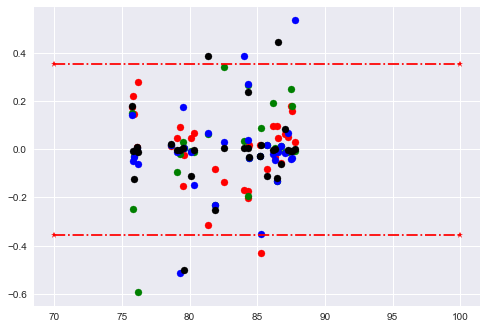

In [26]:
plt.scatter(results.C, results.dfb_Y, color = "red", marker = "o")
plt.scatter(results.C, results.dfb_D2, color = "green", marker = "o")
plt.scatter(results.C, results.dfb_D3, color = "blue", marker = "o")
plt.scatter(results.C, results.dfb_D4, color = "black", marker = "o")
plt.plot((70,100),(0.354, 0.354), '-.r*')
plt.plot((70,100),(-0.354, -0.354), '-.r*')

In [27]:
# Выведем номера всех влиятельных наблюдений согласно DFBETAS для переменной Y

high_dfby = pd.DataFrame((results[abs(results.dfb_Y) > cut_off]))
high_dfby

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
30,2022,3,85.28,107.89,0,0,1,0,0.0,107.89,...,-0.429382,0.086257,-0.350989,0.017409,0.113076,-1.603705,0.180215,-0.751917,-1.654497,-0.775732


In [28]:
# Выведем номера всех влиятельных наблюдений согласно DFBETAS для переменной D2

high_dfbd2 = pd.DataFrame((results[abs(results.dfb_D2) > cut_off]))
high_dfbd2

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
13,2018,2,76.17,98.5,0,1,0,0,98.5,0.0,...,0.279047,-0.593162,-0.061488,-0.011314,0.121707,-1.923935,0.141189,-0.780086,-2.032419,-0.824072


In [29]:
# Выведем номера всех влиятельных наблюдений согласно DFBETAS для переменной D3

high_dfbd3 = pd.DataFrame((results[abs(results.dfb_D3) > cut_off]))
high_dfbd3

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
6,2016,3,84.00,99.02,0,0,1,0,0.0,99.02,...,-0.167521,0.033653,0.386012,0.006792,0.055282,1.310166,0.138693,0.525745,1.328602,0.533143
14,2018,3,79.32,100.82,0,0,1,0,0.0,100.82,...,0.091964,-0.018474,-0.512200,-0.003729,0.094498,-1.801560,0.127078,-0.687380,-1.884793,-0.719137
18,2019,3,87.82,102.29,0,0,1,0,0.0,102.29,...,0.028255,-0.005676,0.534243,-0.001146,0.109582,1.956958,0.125163,0.740210,2.073013,0.784107


In [30]:
# Выведем номера всех влиятельных наблюдений согласно DFBETAS для переменной D4

high_dfbd4 = pd.DataFrame((results[abs(results.dfb_D4) > cut_off]))
high_dfbd4

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
7,2016,4,81.33,94.34,0,0,0,1,0.0,0.0,...,-0.313944,0.063067,0.069177,0.386027,0.073224,1.341114,0.169132,0.605080,1.362197,0.614592
15,2018,4,79.58,99.92,0,0,0,1,0.0,0.0,...,-0.022743,0.004569,0.005011,-0.499189,0.091790,-1.791334,0.125129,-0.677460,-1.872646,-0.708211
19,2019,4,86.53,100.28,0,0,0,1,0.0,0.0,...,0.045680,-0.009176,-0.010066,0.443080,0.074818,1.613368,0.125658,0.611628,1.665526,0.631401


In [31]:
# 5. Анализ выбросов: стьюдентизированные остатки

student_resid = influence.resid_studentized_external
print(student_resid)

[-0.03231652 -0.74013159  0.52069227 -0.40307082  0.95229311  1.18233486
  1.32860183  1.36219667 -0.07571695 -0.32049503 -0.5096329  -0.40709052
 -0.67760929 -2.03241942 -1.88479273 -1.87264628  0.12149683  0.79454158
  2.07301337  1.66552602  0.09480606  1.07568366 -0.19589484  0.31118131
  0.42216853  0.78493945  0.29695178 -0.41315495 -0.83472876 -0.86145684
 -1.65449729 -0.23434812]


In [32]:
# определим критическое значение для стьюдентизированных остатков

from scipy import stats
crit = stats.t(df=26).ppf((0.95))
print(crit)

1.7056179197592727


In [33]:
# Выведем номера всех возможных выбросов согласно стьюдентизированным остаткам

high_stud_res = pd.DataFrame((results[abs(student_resid) > crit]))
high_stud_res

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,...,dfb_Y,dfb_D2,dfb_D3,dfb_D4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
13,2018,2,76.17,98.50,0,1,0,0,98.5,0.00,...,0.279047,-0.593162,-0.061488,-0.011314,0.121707,-1.923935,0.141189,-0.780086,-2.032419,-0.824072
14,2018,3,79.32,100.82,0,0,1,0,0.0,100.82,...,0.091964,-0.018474,-0.512200,-0.003729,0.094498,-1.801560,0.127078,-0.687380,-1.884793,-0.719137
15,2018,4,79.58,99.92,0,0,0,1,0.0,0.00,...,-0.022743,0.004569,0.005011,-0.499189,0.091790,-1.791334,0.125129,-0.677460,-1.872646,-0.708211
18,2019,3,87.82,102.29,0,0,1,0,0.0,102.29,...,0.028255,-0.005676,0.534243,-0.001146,0.109582,1.956958,0.125163,0.740210,2.073013,0.784107


In [34]:
# Удалим влиятельные наблюдения и выбросы и переоценим регерссию заново

data_new = data.drop([13,14,15,18])
data_new

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,yq4
0,2015,1,76.11,92.12,1,0,0,0,0.00,0.00,0.00
1,2015,2,75.80,95.01,0,1,0,0,95.01,0.00,0.00
2,2015,3,79.54,95.27,0,0,1,0,0.00,95.27,0.00
3,2015,4,80.07,97.05,0,0,0,1,0.00,0.00,97.05
4,2016,1,81.86,97.06,1,0,0,0,0.00,0.00,0.00
5,2016,2,82.57,98.99,0,1,0,0,98.99,0.00,0.00
6,2016,3,84.00,99.02,0,0,1,0,0.00,99.02,0.00
7,2016,4,81.33,94.34,0,0,0,1,0.00,0.00,94.34
8,2017,1,78.64,95.50,1,0,0,0,0.00,0.00,0.00
9,2017,2,79.08,98.25,0,1,0,0,98.25,0.00,0.00


In [35]:
len(data_new)

28

In [36]:
# Оценим модель на новой выборке и сравним результаты оценивания с предыдущими, полученными по полной выборке
reg_new = smf.ols('C ~ Y + D2 + D3 + D4', data = data).fit()
print(reg_new.summary())
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     22.79
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.53e-08
Time:                        13:12:17   Log-Likelihood:                -66.356
No. Observations:                  32   AIC:                             142.7
Df Residuals:                      27   BIC:                             150.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8255      8.275      0.583      0.5